In [ ]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install scipy

In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

In [8]:
#load csv
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [107]:
#View dataset detail
boston_df.head()
boston_df.describe()

22.532806324110677


Text(0, 0.5, 'Median value of owner-occupied homes')

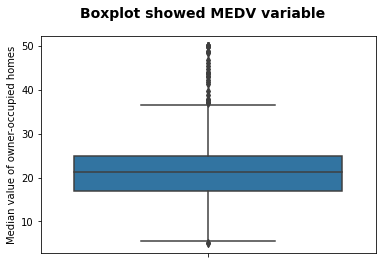

In [108]:
#Median value of owner-occupied homes
val_mean = boston_df["MEDV"].mean()
print(val_mean)

#Create boxplot
fig = plt.figure()
fig.suptitle('Boxplot showed MEDV variable', fontsize=14, fontweight='bold')
ax = sns.boxplot(y='MEDV', data=boston_df)
ax.set_ylabel('Median value of owner-occupied homes')

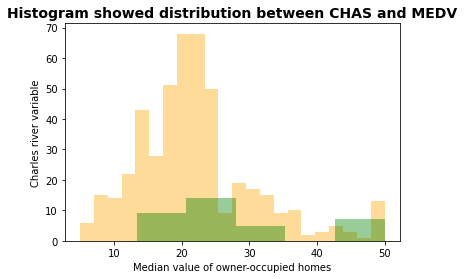

In [73]:
#Provide a  histogram for the Charles river variable compared with MEDV
sns.distplot(boston_df[boston_df['CHAS']==0]["MEDV"], color="orange", kde = False)
sns.distplot(boston_df[boston_df['CHAS']==1]["MEDV"], color="green", kde = False)

plt.title('Histogram showed distribution between CHAS and MEDV', fontsize=14, fontweight='bold')
plt.xlabel("Median value of owner-occupied homes")
plt.ylabel("Charles river variable")
plt.show()


Text(0, 0.5, 'Median value of owner-occupied homes')

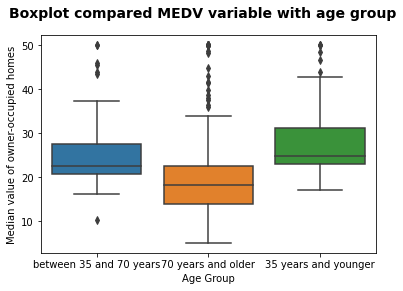

In [64]:
#Provide a boxplot for the MEDV variable vs the AGE variable. 
#Define age group
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

#Create boxplot
fig = plt.figure()
fig.suptitle('Boxplot compared MEDV variable with age group', fontsize=14, fontweight='bold')
ax = sns.boxplot(x="age_group", y="MEDV", data=boston_df)

ax.set_xlabel('Age Group')
ax.set_ylabel('Median value of owner-occupied homes')


Text(0, 0.5, 'Non-retail business acres per town')

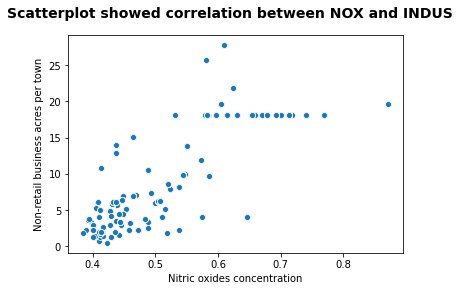

In [80]:
#Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town
fig = plt.figure()
fig.suptitle('Scatterplot showed correlation between NOX and INDUS', fontsize=14, fontweight='bold')
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

ax.set_xlabel('Nitric oxides concentration')
ax.set_ylabel('Non-retail business acres per town')

#From this chart, we can see thatt there is a correlation between NOX and INDUS

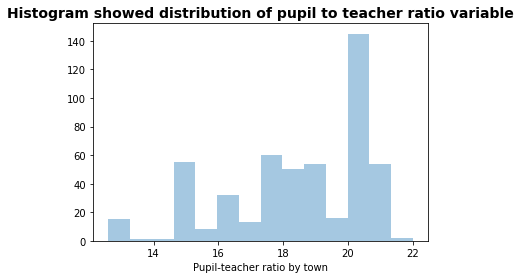

In [86]:
#Histogram for the pupil to teacher ratio variable
ax = sns.distplot(boston_df['PTRATIO'], kde = False)

plt.title('Histogram showed distribution of pupil to teacher ratio variable', fontsize=14, fontweight='bold')
plt.xlabel("Pupil-teacher ratio by town")
plt.show()

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

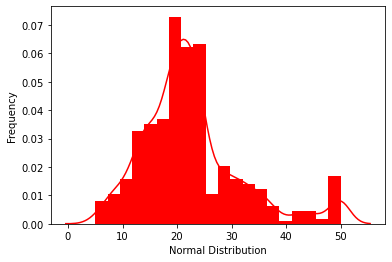

In [91]:
#T-test : a significant difference in median value of houses bounded by the Charles river

#𝐻0:µ1=µ2 ("there is no difference in Median value between houses bounded by the Charles river")
#𝐻1:µ1≠µ2 ("there is a difference in Median value between houses bounded by the Charles river")

#Step1 Check distribution
ax = sns.distplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
#This can assume it is normal.

In [92]:
#Step2 Test for equality of variance
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')
#p-value less than 0.05, this can assume the variance are not equal.

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [95]:
#step3
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

#p-value less than 0.05, this can reject the null hypothesis as there is significant difference in median value and houses bounded by the Charles river.

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

In [96]:
#ANOVA : a difference in Median values of houses (MEDV) for each age group

#𝐻0: µ1=µ2=µ3  (the three population means are equal)
#𝐻1: At least one of the means differ

#Step1 Test for equality of variance
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')
#p-value greater than 0.05, this can assume equality of variance.

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [99]:
#Step2 Run one-way ANOVA

thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)

print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

#p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [102]:
#Pearson correlation : relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

#𝐻0: Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
#𝐻1: Nitric oxide concentrations is correlated with proportion of non-retail business acres per town

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

#p-value(2-tailed) is less than 0.05, reject the Null hypothesis. There is a relationship between NOX and INDUS.

(0.763651446920915, 7.913361061239593e-98)

In [106]:
#Regression analysis : the impact of additional weighted distance to the five Boston employment centres (DIS)
    #on the median value of owner occupied homes (MEDV)

#𝐻0: DIS is not correlated with MEDV
#𝐻1: DIS is correlated with MEDV

x = boston_df["DIS"]
y = boston_df["MEDV"]
x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

#p-value is less than 0.05, reject the Null hypothesis. There is a relationship between DIS and MEDV.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 20 Dec 2020   Prob (F-statistic):           1.21e-08
Time:                        21:09:01   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""